### Problem 4 MILP: process superstructure

A company is considering to produce a chemical C which can be manufactured with either process II or process III, both of which use as raw material chemical B. B can be purchased from another company or else manufactured with process I which uses 
A as a raw material. Given the specifications below, formulate an MILP model and  solve it with PYOMO to decide: 

1. Which process to build (II and III are exclusive)? 
2. How to obtain chemical B? 
3. How much should be produced of product C? 
[//]: #

The objective is to maximize profit. 
Consider the two following cases: 

1. Maximum demand of C is 10 tons/hr with a selling price of 1800 eur/ton. 
2. Maximum demand of C is 15 tons/hr; the selling price for the first 10 ton/hr is 1800 eur/ton, and 1500 eur/ton for the excess. 

Data:

|             | Fixed costs (eur/hr) | Variable costs (eur/ton raw mat) |
|:-----------:|:--------------:|:-------------------------:|
|  Process I  |      1000      |            250            |
|  Process II |      1500      |            400            |
| Process III |      2000      |            550            |



|             | Conversion | 
|:-----------:|:--------------:|
|  Process I  |      90% of A to B      |           
|  Process II |      82% of B to C      |           
| Process III |      95% of B to C      |          

Prices: A: 500 eur/ton;  B: 950 eur/ton <br>
Maximum supply of A: 16 tons/hr <br>

[//]: # "NOTE:You may want to scale your cost coefficients (e.g. divide them by 100)"

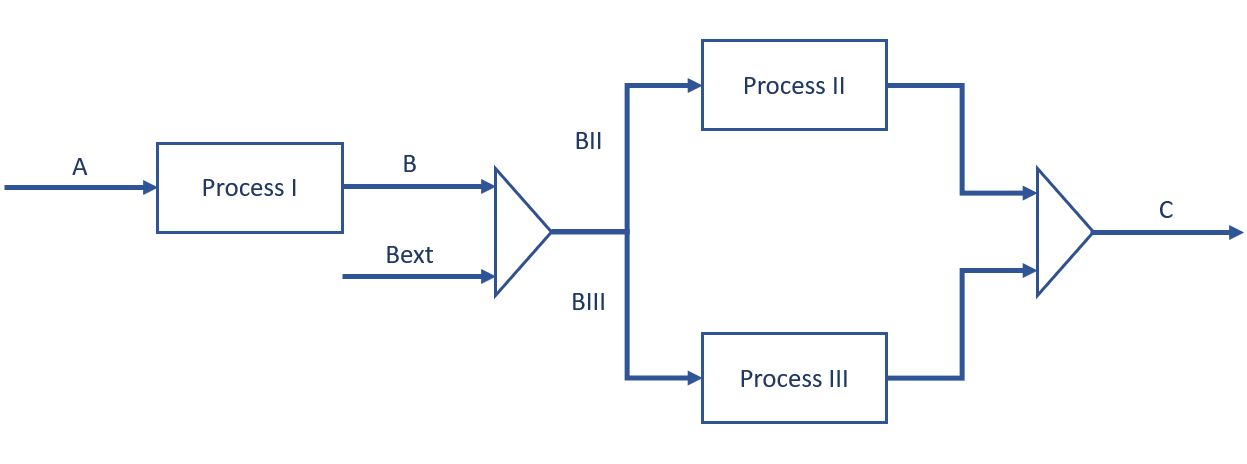

#### Importing PYOMO and creating a concrete model

In [1]:
from pyomo.environ import *
model = ConcreteModel()

#### Definition of variables

In [2]:
model.yI  = Var(within=Binary)
model.yII  = Var(within=Binary)
model.yIII = Var(within=Binary)

model.A   = Var(domain=NonNegativeReals)

model.Bext   = Var(domain=NonNegativeReals)
model.B   = Var(domain=NonNegativeReals)
model.BII  = Var(domain=NonNegativeReals)
model.BIII = Var(domain=NonNegativeReals)

model.C    = Var(domain=NonNegativeReals)
model.CII  = Var(domain=NonNegativeReals)
model.CIII = Var(domain=NonNegativeReals)

#### Constraints

In [3]:
model.MB1=Constraint(expr=(model.CII+model.CIII == model.C))
model.MB2=Constraint(expr=(model.CII ==model.BII*0.82))
model.MB3=Constraint(expr=(model.CIII ==model.BIII*0.95))
model.MB4=Constraint(expr=(model.B+model.Bext == model.BII+model.BIII))
model.MB5=Constraint(expr=(model.B == model.A*0.9))

model.limit_C=Constraint(expr=(model.C<=10))
model.limit_A=Constraint(expr=(model.A<=16))      

model.disj=Constraint(expr=(model.yII+model.yIII==1))
model.contI=Constraint(expr=(model.A<=model.yI*50))
model.contII=Constraint(expr=(model.BII<=model.yII*50))
model.contIII=Constraint(expr=(model.BIII<=model.yIII*50))

####  Objective

In [4]:
model.Obj = Objective(expr=(1800*model.C-500*model.A-950*model.Bext-(250*model.A+1000*model.yI)-(400*model.BII+1500*model.yII) \
                            -(550*model.BIII+2000*model.yIII)) , sense=maximize)

#### Solving the problem

In [5]:
results = SolverFactory('glpk').solve(model).write()
model.pprint()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 459.349593495936
  Upper bound: 459.349593495936
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 12
  Number of nonzeros: 24
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 3
      Number of created subproblems: 3
  Error rc: 0
  Time: 0.04288458824157715
# ----------------------------------------------------------
#   Solution Information
# ------------

#### Now, we solve the second scenario 

In [6]:
model.Obj.deactivate()

model.C1=Var(within=NonNegativeReals)
model.C2=Var(within=NonNegativeReals)
model.MB_C=Constraint(expr=(model.C==model.C1+model.C2))
model.Obj2 = Objective(expr=(1800*model.C1+1500*model.C2-500*model.A-950*model.Bext-(250*model.A+1000*model.yI)-(400*model.BII+1500*model.yII) \
                            -(550*model.BIII+2000*model.yIII)) , sense=maximize)

model.limit_C.deactivate()
model.limit_C_2=Constraint(expr=(model.C<=15))
model.upC1 = Constraint(expr=(model.C1<=10))
model.upC2 = Constraint(expr=(model.C2<=5))

results = SolverFactory('glpk').solve(model).write()
model.pprint()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 600.0
  Upper bound: 600.0
  Number of objectives: 1
  Number of constraints: 15
  Number of variables: 14
  Number of nonzeros: 29
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 5
      Number of created subproblems: 5
  Error rc: 0
  Time: 0.0359044075012207
# ----------------------------------------------------------
#   Solution Information
# -----------------------------------